# Разведочный анализ данных.

**EDA** - Exploratory Data Analysis

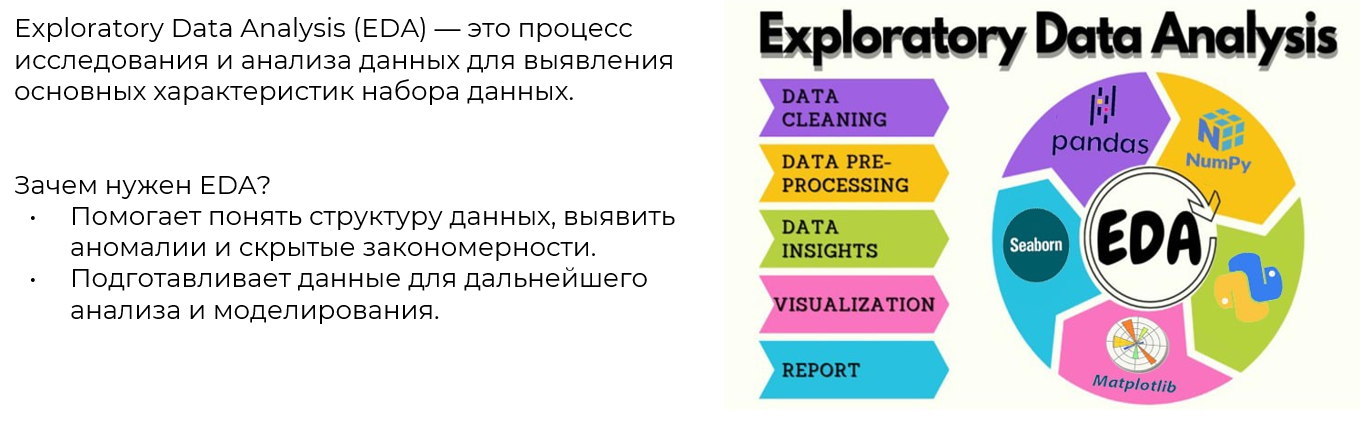

**Зачем?**
- Помогает понять как устроены данные
- Первая проверка фичей на "адекватность"
- _Генерация новых фичей_ - вклад в качество будущей модели

**3 шага EDA в Data Science**
1. Распределение целевой переменной
2. Анализ зависимостей между признаками
3. Анализ влияния признаков на таргет

**Подключение библиотек и скриптов**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

## 0. Первый взгляд на DataSet

### Описание датасета

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [ ]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(3)

### Обзор количественных переменных

In [ ]:
df.dtypes

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

In [ ]:
df.describe()

In [ ]:
df.info()

### Обзор категориальных переменных

In [ ]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

In [ ]:
df['ocean_proximity'].value_counts()

In [ ]:
df['ocean_proximity'].value_counts(normalize=True)

In [ ]:
df['ocean_proximity'].nunique()

In [ ]:
df['ocean_proximity'].unique()

## 1. Распределение целевой переменной

Помните про различие среднего арифметическое, медианы, моды:
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats

x = np.array([1, 4, 2, 6, 3, 8, 2])
print(sorted(x))

# Вычисление статистических значений
mean = np.mean(x)
median = np.quantile(x, q=0.5)
mode = stats.mode(x)


print(f'median = {median}\nmean = {mean}\nmode = {mode[0]}')

# Визуализация данных
sns.displot(x, bins=len(x));


In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
df['median_house_value'].hist()
plt.ylabel('count')
plt.xlabel('median_house_value')


plt.suptitle('Распределение целевой переменной median_house_value')
plt.show()

In [ ]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

In [ ]:

plt.figure(figsize = (16, 10))


sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='?',  linewidth=4)
plt.plot([target_median] * 10, y, label='?',  linewidth=4)
plt.plot([target_mode] * 10, y, label='?', linewidth=4)

plt.title('Распределение целевой переменной median_house_value')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (16, 10))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

## 2. Анализ зависимостей между признаками

### 2.1 Количественные признаки

In [ ]:
# выделяем количественный признаки и удаляем целевую переменную
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [ ]:
# строим распределение каждого из признаков
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [ ]:
# анализ взаимодействия фичей друг от друга
grid = sns.jointplot(x='median_income', y='population', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

In [ ]:
grid = sns.jointplot(x='total_rooms', y='total_bedrooms', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

### 2.2 Матрица корреляций

- Считается для количественных признаков
- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Коррелиция - мера только __линейной__ связи

In [ ]:
df.info()

In [ ]:
plt.figure(figsize = (15,10))

sns.set_theme(font_scale=1.4)

corr_matrix = df.select_dtypes(include=['float64']).corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица кореляций')
plt.show()

### 2.3 Категориальные признаки

In [ ]:
counts = df['ocean_proximity'].value_counts()

plt.figure(figsize=(12,8))
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

## 3. Анализ влияния признаков на таргет

### 3.1 Количественные признаки

In [ ]:
# анализ взаимодействия количественного признака на таргет
grid = sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

### 3.2 Категориальные / бинарные признаки

#### box plot

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='median_house_value', y='ocean_proximity', data=df)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Распределение целевой переменной median_house_value по ocean_proximity')
plt.show()

**Как строится box plot**  



- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25),
- ...

*Интерквартильный размах = q75 - q25

#### Violin plot

In [ ]:
plt.figure(figsize=(16, 8))

sns.violinplot(x='median_house_value', y='ocean_proximity', data=df)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Распределение целевой переменной median_house_value по ocean_proximity')
plt.show()

### 3.3 Гео данные*

In [ ]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

In [ ]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
        s=df['population'] / 50, label='population', c='median_house_value',
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend()
plt.show()